Kerrian LE CAILLEC - Thomas MIGLIASSO

## TP Question I

On travaille dans le cadre du modèle de Black & Scholes. Dans toutes ces questions, on
considère un call européen de maturité $T$ et de strike $K$. On pourra prendre comme valeurs de référence $S_0 = 100, K = 100, T = 1, r = 0.05, \sigma = 0.20$.


1. Pour différentes valeurs de $T$, tracer sur un même graphe en fonction de $S_0$ le prix du call
européen de maturité $T$ obtenu par la formule de Black & Scholes. Commenter. Même question pour le $\Delta$ et le $\Gamma$ du call.

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
S0 = 100
K = 100
T = 1
r = 0.05
sigma = 0.2

In [4]:
def call_price_black_scholes(K, T, S0, r, sigma):
    d1 = 1/(sigma * np.sqrt(T)) * (np.log(S0/K) + (r + sigma**2/2)*T)
    d2 = d1 - sigma * np.sqrt(T)
    return S0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)

def delta_call_bs(K, T, S0, r, sigma):
    d1 = 1/(sigma * np.sqrt(T)) * (np.log(S0/K) + (r + sigma**2/2)*T)
    return norm.cdf(d1)

def gamma_call_bs(K, T, S0, r, sigma):
    d1 = 1/(sigma * np.sqrt(T)) * (np.log(S0/K) + (r + sigma**2/2)*T)
    return norm.pdf(d1) / (S0 * sigma * np.sqrt(T))

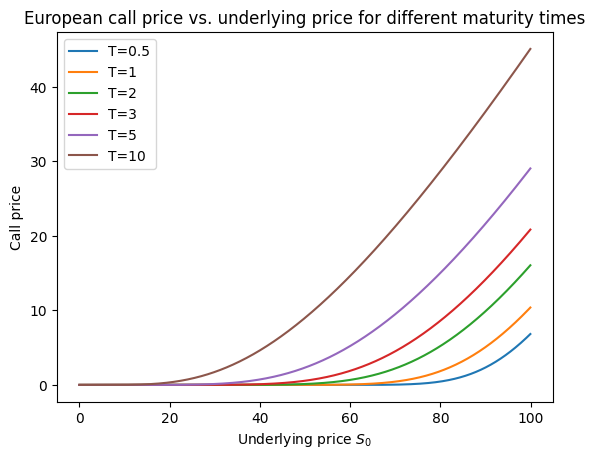

In [5]:
S = np.arange(0.01, 100, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [call_price_black_scholes(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("Call price")
plt.title("European call price vs. underlying price for different maturity times")
plt.legend()
plt.show()

Plus l'horizon d'un call est grand, plus le prix de l'option est élevé et ceci même si le strike price est out-the-money, pour un temps de maturité de 10 ans par exemple, pour $S_0=40$ et $K=100$, le prix de l'option est non nul. Ceci peut s'expliquer par la variance toujours croissante du mouvement Brownien dans les hypothèses du modèle de Black-Scholes en fonction du temps.

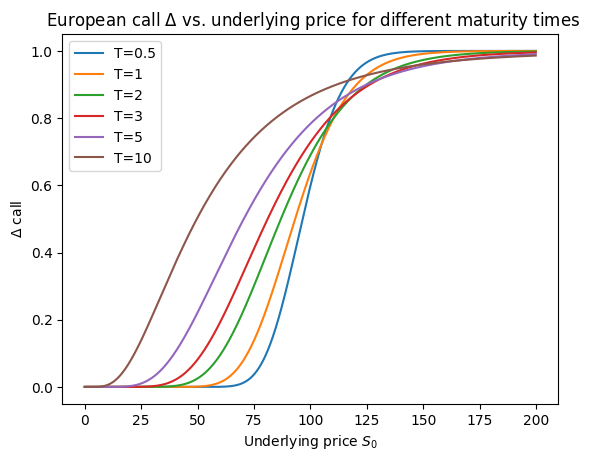

In [6]:
S = np.arange(0.01, 200, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [delta_call_bs(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("$\Delta$ call")
plt.title(" European call $\Delta$ vs. underlying price for different maturity times")
plt.legend()
plt.show()

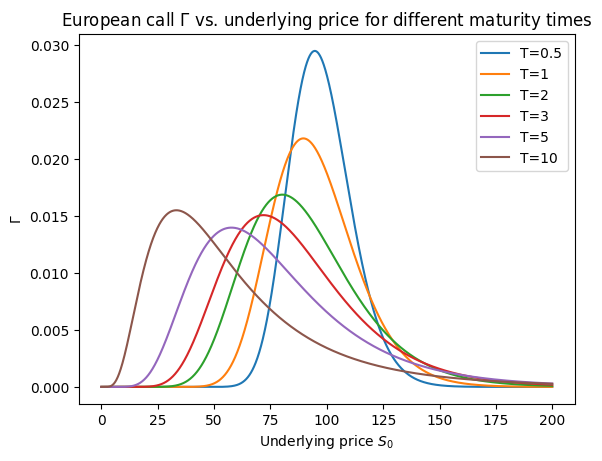

In [7]:
S = np.arange(0.01, 200, 0.1)
for Ti in [0.5, 1, 2, 3, 5, 10]:
    price = [gamma_call_bs(K, Ti, s, r, sigma) for s in S]
    plt.plot(S, price, label=f"T={Ti}")
plt.xlabel("Underlying price $S_0$")
plt.ylabel("$\Gamma$")
plt.title("European call $\Gamma$ vs. underlying price for different maturity times")
plt.legend()
plt.show()

2. Tracer en fonction de N (nombre de simulations) le prix Monte Carlo et l’intervalle de confiance associé (échelle logarithmique sur l'axe des abscisses). Commenter. A partir de
quel N obtient-on une erreur relative du prix Monte Carlo inférieure à 0.1% ?


In [34]:
N = 100

def monte_carlo_price(x, K, T, S0, r, sigma):
    price_at_T = S0 * np.exp((r - sigma**2/2)*T + sigma * x *np.sqrt(T)) - K
    return np.exp(-r*T) * np.maximum(0, price_at_T)

def bessel_standard_error(Xs, N):
    return np.sqrt(np.var(Xs, ddof=1) / N)

def monte_carlo_estimator(N, K, T, S0, r, sigma, alpha=0.05):
    samples = norm.rvs(size=N)
    phis = monte_carlo_price(samples, K, T, S0, r, sigma)
    
    Cn = np.mean(phis)

    return Cn, Cn + np.array(norm.interval(1 - alpha)) * bessel_standard_error(phis, N)

At N=7934096.665797492, the error is lower than 0.1%


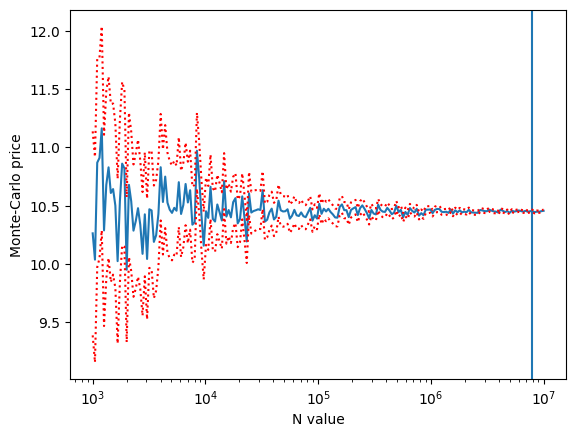

In [60]:
Cns, Cns_up, Cns_down = [], [], []
N_range = np.logspace(3, 7, 200)
for Ni in N_range:
    Cn, error_Cn = monte_carlo_estimator(int(Ni), K, T, S0, r, sigma)
    Cns.append(Cn)
    Cns_up.append(error_Cn[1])
    Cns_down.append(error_Cn[0])
error = (np.array(Cns_up) - np.array(Cns_down)) / (2 * np.array(Cns))
min_thresh = np.argmax(error < 1e-3)

plt.plot(N_range, Cns)
plt.axvline(N_range[min_thresh])
print(f"At N={N_range[min_thresh]}, the error is lower than 0.1%")
plt.plot(N_range, Cns_up, linestyle=":", color="red")
plt.plot(N_range, Cns_down, linestyle=":", color="red")
plt.xscale("log")
plt.xlabel("N value")
plt.ylabel("Monte-Carlo price")
plt.show()